# Import data and create a fracture network entity

This simple notebook will show how to import and plot the Pontrelli dataset and guide teh creation of the different FracAbility entities

In [1]:
from fracability.examples import data  # import the path of the sample data
from fracability import Entities  # import the Entities class

## Get the Pontrelli dataset and display the available file names

In [2]:
pontrelli_data = data.Pontrelli()

In [3]:
pontrelli_data.available_data

['Set_b.shp', 'Set_a.shp', 'Set_c.shp', 'Interpretation_boundary.shp']

In [4]:
data_dict = pontrelli_data.data_dict  # Get dict of paths for the data

set_a_path = data_dict['Set_a.shp']
set_b_path = data_dict['Set_b.shp']
set_c_path = data_dict['Set_c.shp']
boundary_path = data_dict['Interpretation_boundary.shp']

In [5]:
data_dict

{'Set_b.shp': '/home/gabriele/miniconda3/envs/fracability_test/lib/python3.10/site-packages/fracability/examples/datasets/cava_pontrelli/Set_b.shp',
 'Set_a.shp': '/home/gabriele/miniconda3/envs/fracability_test/lib/python3.10/site-packages/fracability/examples/datasets/cava_pontrelli/Set_a.shp',
 'Set_c.shp': '/home/gabriele/miniconda3/envs/fracability_test/lib/python3.10/site-packages/fracability/examples/datasets/cava_pontrelli/Set_c.shp',
 'Interpretation_boundary.shp': '/home/gabriele/miniconda3/envs/fracability_test/lib/python3.10/site-packages/fracability/examples/datasets/cava_pontrelli/Interpretation_boundary.shp'}

## Create and plot the entities objects

In FracAbility a fracture network is composed of: Fractures, Boundaries and Nodes. Fractures can be subdivided in sets (set_n), boundaries in groups (group_n) and nodes in types (n_type). For this notebook we will treat only the importing of fractures and boundaries since is the most common use case scenario. 

In [6]:
# Create the fractures and boundary objects. 
set_a = Entities.Fractures(shp=set_a_path, set_n=1)  # to add your data put the absolute path of the shp file
set_b = Entities.Fractures(shp=set_b_path, set_n=2)
set_c = Entities.Fractures(shp=set_c_path, set_n=3)

boundary = Entities.Boundary(shp=boundary_path, group_n=1)

Entities are internally represented as geopandas dataframes that can be easily viewed. Since it is a geopandas object all the methods and functions for geopandas are available

In [7]:
set_a.entity_df

,id,Fault,Set,dir,geometry,original_line_id,type,censored,f_set,length
0,None,1,1,123.16300,"LINESTRING (636960.853 4518526.132, 636962.332...",1,fracture,0,1,4.8394
1,None,1,1,123.73829,"LINESTRING (636964.885 4518523.498, 636964.905...",2,fracture,0,1,2.4826
2,None,1,1,127.62043,"LINESTRING (636966.863 4518522.211, 636966.965...",3,fracture,0,1,7.7849
3,None,1,1,124.38020,"LINESTRING (636962.413 4518528.099, 636962.681...",4,fracture,0,1,6.5703
4,None,1,1,124.37587,"LINESTRING (636962.398 4518525.605, 636963.005...",5,fracture,0,1,1.6035
...,...,...,...,...,...,...,...,...,...,...
1936,None,0,1,123.82891,"LINESTRING (637015.019 4518530.419, 637015.622...",1937,fracture,0,1,1.4804
1937,None,1,1,126.55001,"LINESTRING (637080.842 4518576.802, 637081.372...",1938,fracture,0,1,1.0023
1938,None,1,1,132.88082,"LINESTRING (637081.336 4518576.563, 637081.647...",1939,fracture,0,1,2.4438
1939,None,1,1,106.56774,"LINESTRING (637040.824 4518482.011, 637041.385...",1940,fracture,0,1,5.4775


The columns up untill the geometry column are the original columns obtained from the shapefile. After the geometry column the rest are added when importing.

<div class="alert alert-info">

**Note:** If the exact names of the new columns are present in the SHP attribute table then they will not be created and the already present data will be used 

</div>

### Plot using VTK or matplotlib

Entities can be plotted and shown using VTK or matplotlib 

<div class="alert alert-info">

**Note:** To plot outside jupyter set notebook=False for vtk while add %matplotlib qt5 at the start of the notebook for matplotlib

</div>

In [8]:
set_a.vtk_plot(linewidth=2, color='blue', notebook=True) # set custom linewidths and color 

Widget(value='<iframe src="http://localhost:37003/index.html?ui=P_0x79958b387370_0&reconnect=auto" class="pyvi…

In [9]:
boundary.vtk_plot(notebook=True)  

Widget(value='<iframe src="http://localhost:37003/index.html?ui=P_0x799594186b00_1&reconnect=auto" class="pyvi…

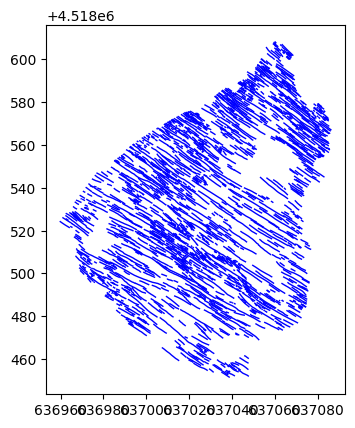

In [10]:
set_a.mat_plot(linewidth=1, color='blue') # set custom linewidths and color 


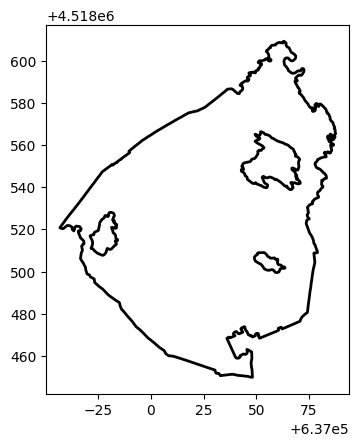

In [11]:
boundary.mat_plot(linewidth=2, color='black')

## Create the Fracture network object

Create the fracture net object. This is the main entity since from this entity all the different topological and statistical calculations will be carried out. 

In [12]:
fracture_net = Entities.FractureNetwork()

fracture_net.add_fractures(set_a)
fracture_net.add_fractures(set_b)
fracture_net.add_fractures(set_c)
fracture_net.add_boundaries(boundary)

Also the fracture network object is represented as a dataframe, in this case a normal pandas dataframe composed as such

In [13]:
fracture_net.entity_df

,type,object,n_type,f_set,b_group,active
0,fractures,<fracability.Entities.Fractures object at 0x79...,NaN,1,NaN,1
1,fractures,<fracability.Entities.Fractures object at 0x79...,NaN,2,NaN,1
2,fractures,<fracability.Entities.Fractures object at 0x79...,NaN,3,NaN,1
3,boundary,<fracability.Entities.Boundary object at 0x799...,NaN,NaN,1,1


### Activate and deactivate

The entity_df property for the fracture_network entity returns a summarizing df that describes the general Entity composition of the network. The "active" field shows which Entities are active and which are not. Functions, properties and methods of FractureNetworks class work only on active entities. 
So for example, to show the entire fracture network's active components: 

In [14]:
fracture_net.fracture_network_to_components_df()

,id,Fault,Set,dir,geometry,original_line_id,type,censored,f_set,length,Type,b_group
0,None,1.0,1.0,123.16300,"LINESTRING (636960.853 4518526.132, 636962.332...",1,fracture,0,1,4.8394,NaN,-9999
1,None,1.0,1.0,123.73829,"LINESTRING (636964.885 4518523.498, 636964.905...",2,fracture,0,1,2.4826,NaN,-9999
2,None,1.0,1.0,127.62043,"LINESTRING (636966.863 4518522.211, 636966.965...",3,fracture,0,1,7.7849,NaN,-9999
3,None,1.0,1.0,124.38020,"LINESTRING (636962.413 4518528.099, 636962.681...",4,fracture,0,1,6.5703,NaN,-9999
4,None,1.0,1.0,124.37587,"LINESTRING (636962.398 4518525.605, 636963.005...",5,fracture,0,1,1.6035,NaN,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...
4267,NaN,1.0,3.0,NaN,"LINESTRING (637040.327 4518518.176, 637041.109...",807,fracture,0,3,6.7299,NaN,-9999
4268,None,NaN,NaN,NaN,"LINESTRING (637076.350 4518496.657, 637076.210...",1,boundary,-9999,-9999,NaN,NaN,1
4269,None,NaN,NaN,NaN,"LINESTRING (637058.063 4518506.353, 637056.769...",2,boundary,-9999,-9999,NaN,NaN,1
4270,None,NaN,NaN,NaN,"LINESTRING (637060.752 4518561.479, 637059.900...",3,boundary,-9999,-9999,NaN,NaN,1


However, if we activate fracture sets 2 and 3, the shown components will be relative only to fracture set 2 and 3 and the boundary

<div class="alert alert-info">

**Note:** If an empty list is used then all the available sets will be deactivated. conversely if None is used, then all the available sets will be activated.

</div>

In [15]:
fracture_net.activate_fractures([2,3]) # this will activate frature sets 2 and 3
fracture_net.fracture_network_to_components_df()

,id,Fault,Type,Set,geometry,original_line_id,type,censored,f_set,length,b_group
0,0.0,NaN,1.0,2.0,"LINESTRING (637065.886 4518484.873, 637066.160...",1,fracture,0,2,3.7534,-9999
1,0.0,NaN,1.0,2.0,"LINESTRING (637069.593 4518486.002, 637069.960...",2,fracture,0,2,1.3761,-9999
2,0.0,1.0,1.0,2.0,"LINESTRING (637073.475 4518494.691, 637074.444...",3,fracture,0,2,2.6681,-9999
3,0.0,0.0,1.0,2.0,"LINESTRING (637069.019 4518490.910, 637069.683...",4,fracture,0,2,1.5584,-9999
4,0.0,0.0,1.0,2.0,"LINESTRING (637071.167 4518491.422, 637071.508...",5,fracture,0,2,4.5830,-9999
...,...,...,...,...,...,...,...,...,...,...,...
2326,NaN,1.0,NaN,3.0,"LINESTRING (637040.327 4518518.176, 637041.109...",807,fracture,0,3,6.7299,-9999
2327,NaN,NaN,NaN,NaN,"LINESTRING (637076.350 4518496.657, 637076.210...",1,boundary,-9999,-9999,NaN,1
2328,NaN,NaN,NaN,NaN,"LINESTRING (637058.063 4518506.353, 637056.769...",2,boundary,-9999,-9999,NaN,1
2329,NaN,NaN,NaN,NaN,"LINESTRING (637060.752 4518561.479, 637059.900...",3,boundary,-9999,-9999,NaN,1


In [16]:
fracture_net.activate_fractures([1]) # this will activate frature set 1
fracture_net.fracture_network_to_components_df()

,id,Fault,Set,dir,geometry,original_line_id,type,censored,f_set,length,b_group
0,None,1.0,1.0,123.16300,"LINESTRING (636960.853 4518526.132, 636962.332...",1,fracture,0,1,4.8394,-9999
1,None,1.0,1.0,123.73829,"LINESTRING (636964.885 4518523.498, 636964.905...",2,fracture,0,1,2.4826,-9999
2,None,1.0,1.0,127.62043,"LINESTRING (636966.863 4518522.211, 636966.965...",3,fracture,0,1,7.7849,-9999
3,None,1.0,1.0,124.38020,"LINESTRING (636962.413 4518528.099, 636962.681...",4,fracture,0,1,6.5703,-9999
4,None,1.0,1.0,124.37587,"LINESTRING (636962.398 4518525.605, 636963.005...",5,fracture,0,1,1.6035,-9999
...,...,...,...,...,...,...,...,...,...,...,...
1940,None,1.0,1.0,123.48189,"LINESTRING (637056.496 4518515.642, 637057.313...",1941,fracture,0,1,5.9854,-9999
1941,None,NaN,NaN,NaN,"LINESTRING (637076.350 4518496.657, 637076.210...",1,boundary,-9999,-9999,NaN,1
1942,None,NaN,NaN,NaN,"LINESTRING (637058.063 4518506.353, 637056.769...",2,boundary,-9999,-9999,NaN,1
1943,None,NaN,NaN,NaN,"LINESTRING (637060.752 4518561.479, 637059.900...",3,boundary,-9999,-9999,NaN,1


In [17]:
fracture_net.activate_fractures([]) # this will deactivate all fracture sets
fracture_net.entity_df #fracture_network_to_components_df() will return an error because no fractures are present

,type,object,n_type,f_set,b_group,active
0,fractures,<fracability.Entities.Fractures object at 0x79...,NaN,1,NaN,0
1,fractures,<fracability.Entities.Fractures object at 0x79...,NaN,2,NaN,0
2,fractures,<fracability.Entities.Fractures object at 0x79...,NaN,3,NaN,0
3,boundary,<fracability.Entities.Boundary object at 0x799...,NaN,NaN,1,1


In [18]:
fracture_net.activate_fractures() # this will activate all fracture sets
fracture_net.fracture_network_to_components_df()

,id,Fault,Set,dir,geometry,original_line_id,type,censored,f_set,length,Type,b_group
0,None,1.0,1.0,123.16300,"LINESTRING (636960.853 4518526.132, 636962.332...",1,fracture,0,1,4.8394,NaN,-9999
1,None,1.0,1.0,123.73829,"LINESTRING (636964.885 4518523.498, 636964.905...",2,fracture,0,1,2.4826,NaN,-9999
2,None,1.0,1.0,127.62043,"LINESTRING (636966.863 4518522.211, 636966.965...",3,fracture,0,1,7.7849,NaN,-9999
3,None,1.0,1.0,124.38020,"LINESTRING (636962.413 4518528.099, 636962.681...",4,fracture,0,1,6.5703,NaN,-9999
4,None,1.0,1.0,124.37587,"LINESTRING (636962.398 4518525.605, 636963.005...",5,fracture,0,1,1.6035,NaN,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...
4267,NaN,1.0,3.0,NaN,"LINESTRING (637040.327 4518518.176, 637041.109...",807,fracture,0,3,6.7299,NaN,-9999
4268,None,NaN,NaN,NaN,"LINESTRING (637076.350 4518496.657, 637076.210...",1,boundary,-9999,-9999,NaN,NaN,1
4269,None,NaN,NaN,NaN,"LINESTRING (637058.063 4518506.353, 637056.769...",2,boundary,-9999,-9999,NaN,NaN,1
4270,None,NaN,NaN,NaN,"LINESTRING (637060.752 4518561.479, 637059.900...",3,boundary,-9999,-9999,NaN,NaN,1


### Plot using VTK or matplotlib

As the other entities the fracture network can be plotted with vtk or matplotlib

In [19]:
fracture_net.vtk_plot(fracture_linewidth=1, boundary_linewidth=2, 
                      fracture_color='black', boundary_color='red') # set fracture color and set linewidth size

Widget(value='<iframe src="http://localhost:37003/index.html?ui=P_0x79958650ca60_2&reconnect=auto" class="pyvi…

You can plot also only fracture set 1 and the boundary

In [20]:
fracture_net.activate_fractures([1]) # this is the same as .deactivate_fractures([2,3])
fracture_net.vtk_plot(fracture_linewidth=1, boundary_linewidth=2, 
                      fracture_color='black', boundary_color='red') # set fracture color and set linewidth size

Widget(value='<iframe src="http://localhost:37003/index.html?ui=P_0x799586998460_5&reconnect=auto" class="pyvi…